In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.cm as cm
from matplotlib.ticker import ScalarFormatter

**Figure 1a**

In [28]:
tau_ls = np.array([5,10,20,30,50])
omega_ls = np.linspace(0,10,1000)
Gomega = np.load('fig1a_data.npy')

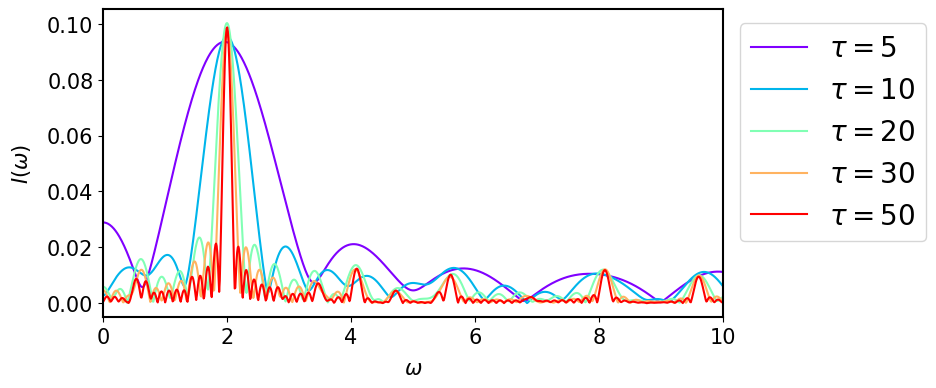

In [30]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)

colors = cm.rainbow(np.linspace(0, 1, tau_ls.shape[0]))
for k in range(tau_ls.shape[0]):
    ax.plot(omega_ls, np.abs(Gomega[:,k]), c=colors[k], ls='-', lw=1.5, label=r'$\tau=${}'.format(int(tau_ls[k])))
                 
ax.set_xlabel(r'$\omega$', fontsize=15, labelpad=8)
ax.set_ylabel(r'$I\left(\omega\right)$', fontsize=15, labelpad=10)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_xlim(0,10)
ax = fig.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.legend(loc='center right', bbox_to_anchor=(1.35, 0.6), fontsize = 20)

In [34]:
"""Inset plot"""
tau_ls = np.linspace(2,100,50)
FWHM = np.load('fig1a_inset_data.npy')

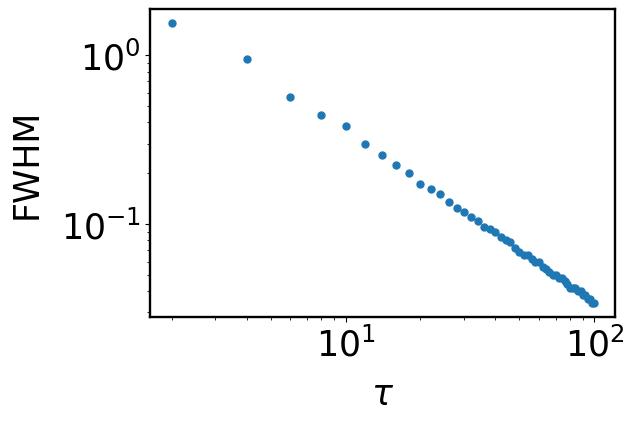

In [35]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
ax.plot(tau_ls,FWHM,'.', markersize=10)
ax.set_xlabel(r'$\tau$', fontsize=25, labelpad=10)
ax.set_ylabel('FWHM', fontsize=25, labelpad=12)
ax.xaxis.set_tick_params(labelsize=25)
ax.yaxis.set_tick_params(labelsize=25)
ax = fig.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.7)
ax.set_yscale('log')
ax.set_xscale('log')

**Figure 1b**

In [37]:
tau_ls = np.array([40,60, 80, 100,140])
omega_ls = np.linspace(-0.1,1,1000)
Gomega = np.load('fig1b_data.npy')

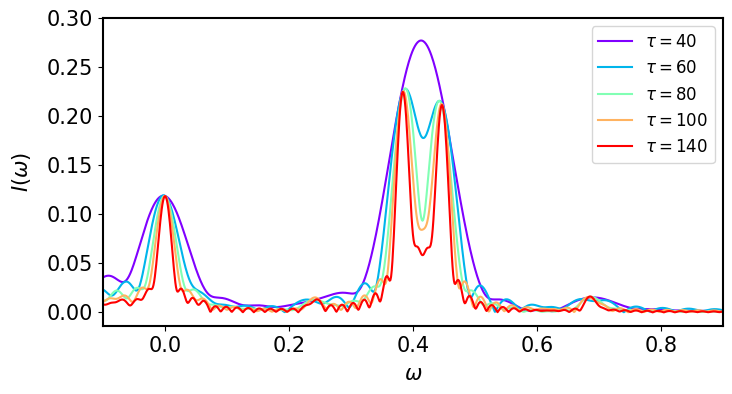

In [43]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
colors = cm.rainbow(np.linspace(0, 1, tau_ls.shape[0]))
for k in range(tau_ls.shape[0]):
    ax.plot(omega_ls, np.abs(Gomega[:,k]), c=colors[k], ls='-', lw=1.5, label=r'$\tau=${}'.format(int(tau_ls[k])))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_xlabel(r'$\omega$', fontsize=15, labelpad=6)
ax.set_ylabel(r'$I\left(\omega\right)$', fontsize=15, labelpad=10)
ax.set_xlim(-0.1,0.9)
ax.set_ylim(top=0.3)
ax.legend(fontsize=12)

In [49]:
"""Inset plot"""
tau_ls = np.linspace(50,500,50)
omega_ls = np.linspace(0.35,0.4,2000)
ite = 2500
dt = 0.001
error1 = np.load('fig1b_inset_data.npy')

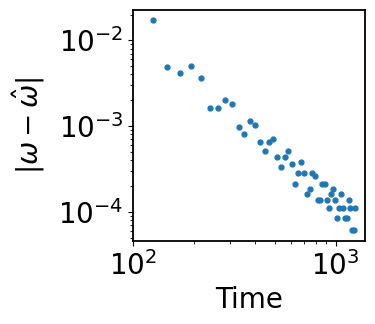

In [50]:
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.plot(tau_ls*ite*dt,error1,'.', markersize=7)
ax.set_xlabel('Time', fontsize=20, labelpad=4)
ax.set_ylabel(r'$|\omega-\hat{\omega}|$', fontsize=20, labelpad=8)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.3)
ax.set_yscale('log')
ax.set_xscale('log')
plt.xticks([100,1000])
plt.show()

**Figure 3**

In [2]:
def exponential_func(x, alpha):
    return np.exp(-alpha * x)

def calculate_r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

In [4]:
depth_ls = [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13]
rate_ls = [0.001,0.003,0.005, 0.008,0.01]
result_local_noise_average = np.load('fig3_data.npy')

Fitted alpha: [0.013392649340518663, 0.039069152648288315, 0.06348714053929691, 0.09806837018720363, 0.12005796862074673]


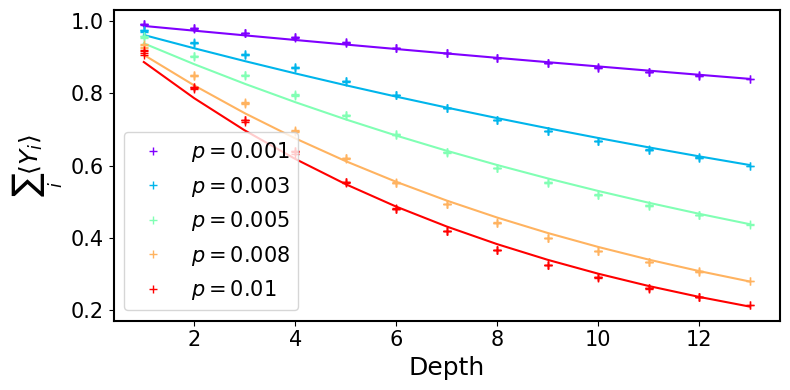

In [7]:
alphas = []
for idx, p in enumerate(rate_ls):
    popt, pcov = curve_fit(exponential_func, depth_ls, result_local_noise_average[:,idx])
    alphas.append(popt[0])
print(f"Fitted alpha: {alphas}")

colors = cm.rainbow(np.linspace(0, 1, len(rate_ls)))
r_squared = []
fig, ax = plt.subplots(figsize=(8, 4))

for idx, p in enumerate(rate_ls):
    ax.plot(depth_ls, np.real(result_local_noise_average[:,idx]),'+', label = rf'$p={p}$', color = colors[idx])
    y_fit = exponential_func(np.array(depth_ls), alphas[idx])
    r_squared.append(calculate_r_squared(result_local_noise_average[:,idx], y_fit))
    ax.plot(depth_ls, y_fit, color = colors[idx])

font = {'family': 'serif',
        'weight': 'normal',
        'size': 16,
        }

ax.set_xlabel('Depth', fontsize=18)
ax.set_ylabel(r'$\sum_i \langle Y_i \rangle$', fontsize=18)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1.3)

ax.legend(loc='best', fontsize=15, frameon=True)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
plt.tight_layout()
plt.show()

In [8]:
r_squared

[0.9918846290391881,
 0.9925682555170218,
 0.993096475727697,
 0.9937631807671541,
 0.994178103921792]

**Figure 4a**

In [16]:
time_ls = np.linspace(0.1,5,50)
total_obs_noisy = np.load('fig4a_noisy_data.npy')
total_obs_qem = np.load('fig4a_qem_data.npy')
total_obs = np.load('fig4a_ideal_data.npy')

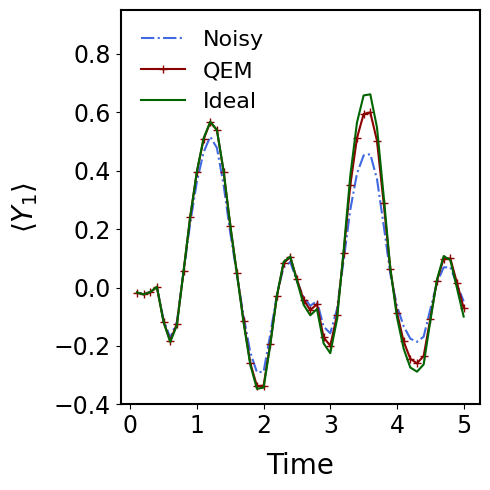

In [17]:

fig, ax = plt.subplots(figsize=(5, 5))  # Create a single plot with size 5x5

# Plot only the data for pos = 1
pos = 1


ax.plot(time_ls, total_obs_noisy[:,pos], "-.", color='royalblue', label="Noisy", lw=1.5)
ax.plot(time_ls, total_obs_qem[:,pos], "-+", color='darkred', label="QEM", lw=1.5)
ax.plot(time_ls, total_obs[:,pos], "-", color='darkgreen', label="Ideal", lw=1.5)
# Increase font size for labels and ticks
ax.set_xlabel('Time', fontsize=20, labelpad=10)  # Increase font size of x-axis label
ax.set_ylabel(fr'$\langle Y_{{{pos}}}\rangle$', fontsize=20, labelpad=10)  # Increase font size of y-axis label

ax.tick_params(axis='both', which='major', labelsize=17)  # Increase font size of axis ticks

# Customize plot appearance
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.3)

ax.locator_params(axis='x', nbins=5)
ax.set_xticks([0,1, 2, 3, 4, 5])
ax.set_ylim(-0.4,0.95)
handles, labels = ax.get_legend_handles_labels()  
ax.legend(handles, labels, fontsize=16, frameon=False, loc = "upper left",ncol = 1)  
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)

plt.tight_layout()
plt.show()


**Figure 4b**

In [18]:
def error(x,y): #Root mean squared error
    return np.sqrt((np.abs(x-y)**2).sum()/(x.size))

error_noisy = []
error_qem = []
error_noisy_qem = []
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
for idx, t in enumerate(time_ls):
    error_noisy.append(error(total_obs[idx,:],total_obs_noisy[idx,:]))
    error_qem.append(error(total_obs[idx,:], total_obs_qem[idx,:]))
    error_noisy_qem.append(error(total_obs_noisy[idx,:], total_obs_qem[idx,:]))

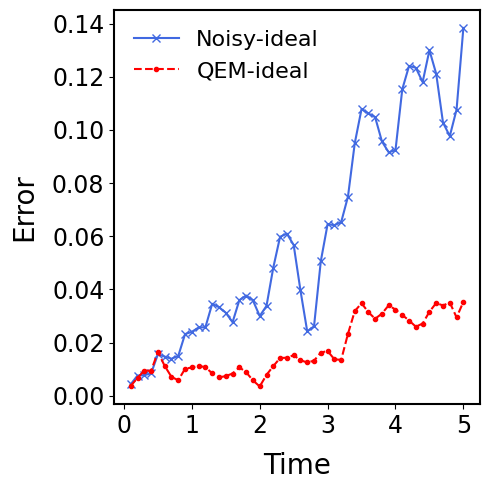

In [19]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(time_ls, error_noisy, "x-", color='royalblue', label="Noisy-ideal", lw=1.5)  
ax.plot(time_ls, error_qem, ".--", color='red', label="QEM-ideal", lw=1.5) 

ax.set_xlabel('Time', fontsize=20, labelpad=10) 
ax.set_ylabel('Error', fontsize=20, labelpad=10)
ax.xaxis.set_tick_params(labelsize=17)
ax.yaxis.set_tick_params(labelsize=17)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1.3)

plt.locator_params(axis='x', nbins=5)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
    
ax.set_xticks([0,1, 2, 3, 4, 5])
ax.legend(fontsize=16, frameon=False)
plt.tight_layout()
plt.show()


**Figure 4c**

In [20]:
bits = 7
def fourier_transform(total_obs, time_ls):
    new_ntot = np.fliplr(total_obs)
    new_ntot = (new_ntot+total_obs)/2
    delta_t = time_ls[len(time_ls)-1]/len(time_ls)
    omega_ls = np.linspace(-10,10,len(time_ls))
    lambda_ls = np.linspace (-np.pi,np.pi,bits)
    Gomega = np.empty(shape = (omega_ls.shape[0],lambda_ls.shape[0]))
    for i in range(omega_ls.shape[0]):
        for m in range(lambda_ls.shape[0]):
            omega = omega_ls[i]
            wave = lambda_ls[m]
            tmp = 0.0
            for k, t in enumerate(time_ls):
                for l in range(bits):
                    tmp = tmp + new_ntot[k,l]*np.exp(1.0j*(omega*t-wave*l))*delta_t/(2*math.sqrt(np.pi))
            Gomega[i,m] = np.abs(tmp)
    Gomega[0,:]=0
    data = np.abs(Gomega)/np.max(np.abs(Gomega))
    return data, omega_ls, lambda_ls

freq_noisy, omega_ls, lambda_ls = fourier_transform(total_obs_noisy, time_ls)
freq_qem, omega_ls, lambda_ls = fourier_transform(total_obs_qem, time_ls)
freq_ideal, omega_ls, lambda_ls = fourier_transform(total_obs, time_ls)

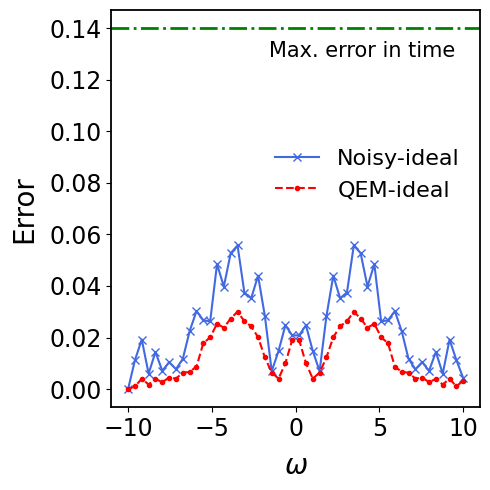

In [23]:
error_freq_noisy = []
error_freq_qem = []

for idx, t in enumerate(time_ls):
    error_freq_noisy.append(error(freq_ideal[idx,:], freq_noisy[idx,:]))
    error_freq_qem.append(error(freq_ideal[idx,:], freq_qem[idx,:]))

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot with dark blue crosses and dark red circles, keeping solid lines
ax.plot(omega_ls, error_freq_noisy, "x-", color='royalblue', label="Noisy-ideal", lw=1.5)
ax.plot(omega_ls, error_freq_qem, ".--", color='red', label="QEM-ideal", lw=1.5)  



ax.axhline(y=0.14, color='green', linestyle='-.', lw = 2)
ax.text(9.5, 0.135, 'Max. error in time', va='top', ha='right', backgroundcolor='white', fontsize=15)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
# Set labels and axis formatting
ax.set_xlabel(rf'$\omega$', fontsize=20, labelpad=8)
ax.set_ylabel('Error', fontsize=20, labelpad=8)
ax.xaxis.set_tick_params(labelsize=17)
ax.yaxis.set_tick_params(labelsize=17)

# Customize plot appearance
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1.3)

plt.locator_params(axis='x', nbins=5)
ax.legend(fontsize=16, frameon=False, loc='upper right', bbox_to_anchor=(1, 0.7))
plt.tight_layout()
plt.show()


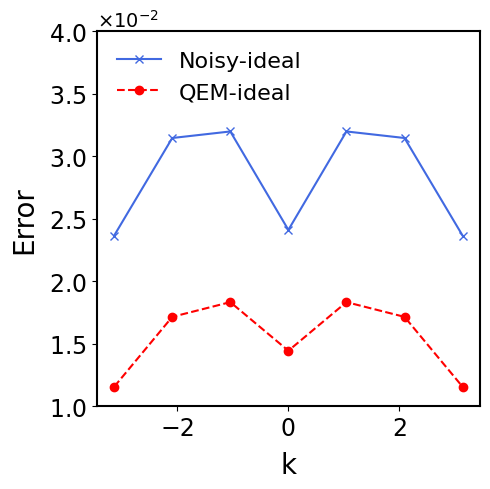

In [27]:
error_freq_noisy = []
error_freq_qem = []

for idx, t in enumerate(lambda_ls):
    error_freq_noisy.append(error(freq_ideal[:,idx], freq_noisy[:,idx]))
    error_freq_qem.append(error(freq_ideal[:,idx], freq_qem[:,idx]))


fig = plt.figure(figsize=(5, 5)) 
ax = fig.add_subplot(1, 1, 1)


ax.plot(lambda_ls, error_freq_noisy, "x-", color='royalblue', label="Noisy-ideal", lw=1.5)  # Dark blue crosses with solid line
ax.plot(lambda_ls, error_freq_qem, "o--", color='red', label="QEM-ideal", lw=1.5, markersize=6)  # Dark red circles with solid line and smaller circles


ax.set_xlabel('k', fontsize=20, labelpad=8)  
ax.set_ylabel('Error', fontsize=20, labelpad=8)  
ax.xaxis.set_tick_params(labelsize=17)  
ax.yaxis.set_tick_params(labelsize=17)  

formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2))  
ax.yaxis.set_major_formatter(formatter)

ax.yaxis.get_offset_text().set_fontsize(14)


for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1.3)

plt.locator_params(axis='x', nbins=5)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)

ax.legend(fontsize=16, frameon=False, loc='upper left')
ax.set_ylim(1e-2,4e-2)
plt.tight_layout()
plt.show()
